# Parameter Search
For all algorithms and all medications in sample dataset

We'll start with our standard set of initial imports

In [1]:
import outliers
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

prescription = pd.read_csv('data/prescriptions_sample.csv.gz', compression='gzip')

## Total number of medications

In [2]:
medications = outliers.getOverdoseMedications(prescription)
len(medications)

21

## Parameter Search Method

Method defined in outliers.py
- This method get all medications in array and run all epsilon parameter in all algorithms
- For each medication it print the best parameter for each algorithm

In [3]:
ep_range = np.arange(0.01,1.0,0.01)
results, max_f = outliers.runParameterSearch(prescription, np.asarray(medications), ep_range)

ALOPURINOL, 4729, 12, , (DDC-H+0.01), 0.0, , (DDC+0.91), 0.292682926829, , (IsoF+0.01), 0.363636363636, , (DDC-J+0.04), 0.393442622951, , (DDC-C+0.48), 0.533333333333, , (Cov+0.21), 0.888888888889, , (LOF+0.06), 0.06, , (Gau+0.02), 0.0159045725646, , (SVM+0.02), 0.151898734177, 
AMPICILINA, 7226, 267, , (DDC-H+0.87), 0.7365356623, , (DDC+0.92), 0.948490230906, , (IsoF+0.02), 0.921675774135, , (DDC-J+0.25), 0.754237288136, , (DDC-C+0.68), 0.0440251572327, , (Cov+0.04), 0.933579335793, , (LOF+0.01), 1.0, , (Gau+0.17), 0.948490230906, , (SVM+0.06), 0.754237288136, 
ANLODIPINO, 10392, 38, , (DDC-H+0.89), 0.0134907251265, , (DDC+0.92), 0.883720930233, , (IsoF+0.01), 0.0588235294118, , (DDC-J+0.02), 0.730769230769, , (DDC-C+0.6), 0.376811594203, , (Cov+0.01), 0.0, , (LOF+0.01), 0.00728667305849, , (Gau+0.02), 0.121212121212, , (SVM+0.13), 0.121212121212, 
BISACODIL, 9483, 11, , (DDC-H+0.93), 0.0326894502229, , (DDC+0.93), 0.372881355932, , (IsoF+0.01), 0.0512820512821, , (DDC-J+0.01), 0.5333

## Final Table Result

Here we show the mean result for each algorithm

In [4]:
display(results)

,Time,Accuracy,Recall,Precision,F-Measure
DDC-H,0.058762,0.949810,0.748599,0.348078,0.390684
DDC,0.053476,0.976980,0.930633,0.409709,0.523282
IsoF,0.437810,0.978089,0.874690,0.396572,0.479750
DDC-J,0.037333,0.981512,0.942904,0.550442,0.650625
DDC-C,0.109190,0.964550,0.719013,0.519122,0.499178
Cov,0.386905,0.939069,0.840725,0.524324,0.597672
LOF,1.066952,0.907025,0.905130,0.337216,0.400685
Gau,0.014333,0.873174,0.895962,0.233794,0.313558
SVM,0.208619,0.846274,0.977882,0.258077,0.330547


## BoxPlot Result

F-Measure distribution for each algorithm

1 DDC-H
2 DDC
3 IsoF
4 DDC-J
5 DDC-C
6 Cov
7 LOF
8 Gau
9 SVM


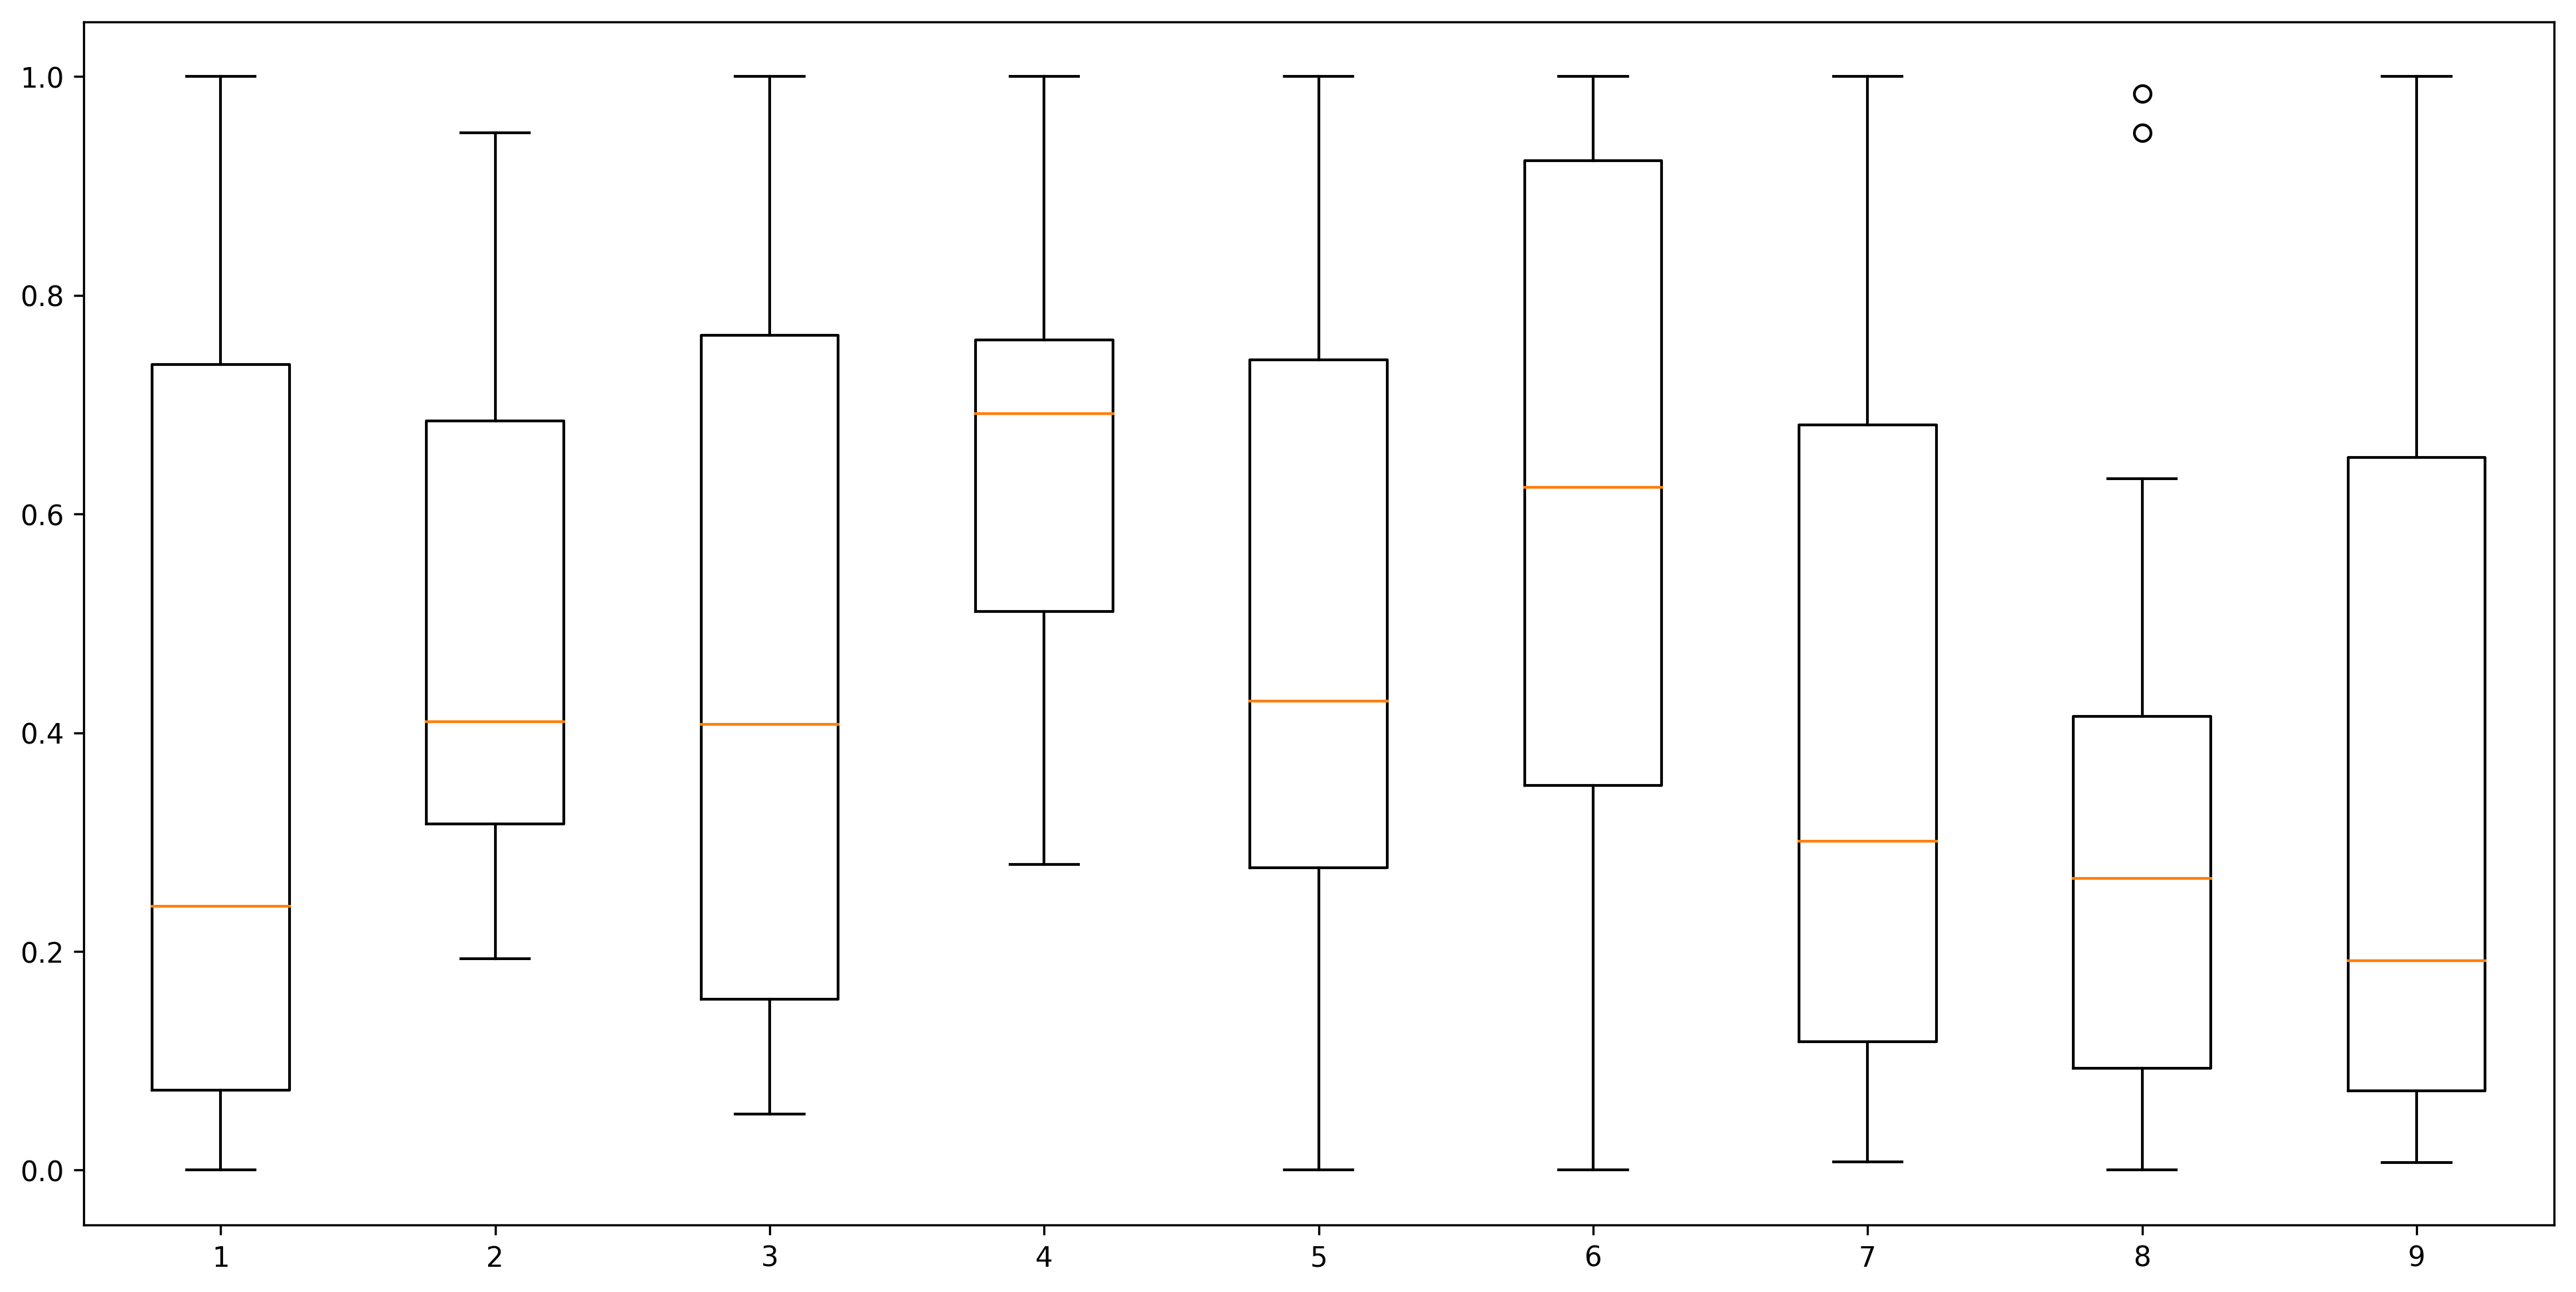

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi= 300)

data = []

for i, m in enumerate(max_f.index):
    print(i+1,m)
    data.append(max_f.loc[m].values)
    
plt.boxplot(data)

plt.show()